<a href="https://colab.research.google.com/github/Baberbaba/Baberbaba/blob/main/Ab%20testing%20basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Statistical Inference (two populations)

In this demonstration, we'll understand how to draw statistical inferences with two samples drawn from different populations.
We will be interested in:
- Determining whether the population means are different.
- Constructing confidence intervals for the difference in population means.
---

## Demonstration Overview

- Problem Statement Discussion
- Data Preparation and Exploratory Data Analysis
- Hypothesis Testing for Difference in Means
    - Independent Samples
        - Equal variances
        - Unequal variances
    - Paired Samples
    
---

### Problem Statement

A restaurant chain is interested in knowing whether a new storefront look and employee uniforms can improve sales. For conducting this experiment, 2 restaurant stores are chosen with similar location and similar performance for the treatment and the control groups. Here's an overview

**Treatment Group**
- *Store Owner*: Andy
- *Changes made*: New Storefront look, employee uniforms

**Control Group**
- *Store Ower*: Bob
- *Changes made*: No changes

We use a 14 day testing period to estimate which storefront look does "*better*"

Now let's go ahead and analyze the dataset

---

### Data Preparation and EDA

In [1]:
### Import the libraries
import pandas as pd
import seaborn as sns

In [2]:
##Import the dataset
df = pd.read_excel('/TwoSample.xlsx')
df.head()


,Day,Andy,Bob
0,Tuesday,981,933
1,Friday,1932,1827
2,Tuesday,873,825
3,Thursday,1338,1281
4,Sunday,1349,1267


Let's prepare a few visualizations to analyze the data

<Axes: >

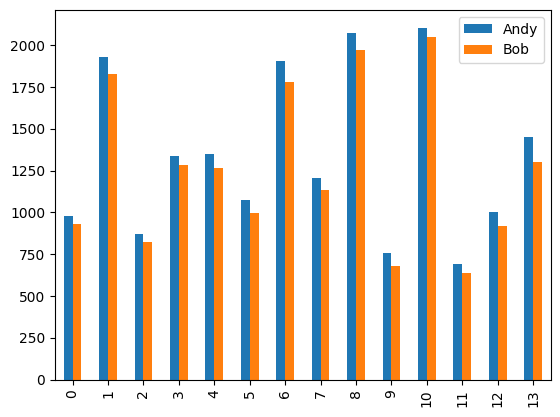

In [7]:
## We can observe the day wise trends for both Andy and Bob using a grouped bar chart
df.plot(kind='bar')

**Observations**:


Next, let's compare the sales distributions for both the stores

In [ ]:
## We shall use a boxplot for this
## You can directly pass the DataFrame as an argument and the sns.boxplot function would only consider the numeric columns
## Which in this case are the columns 'Andy' and 'Bob'

<Axes: >

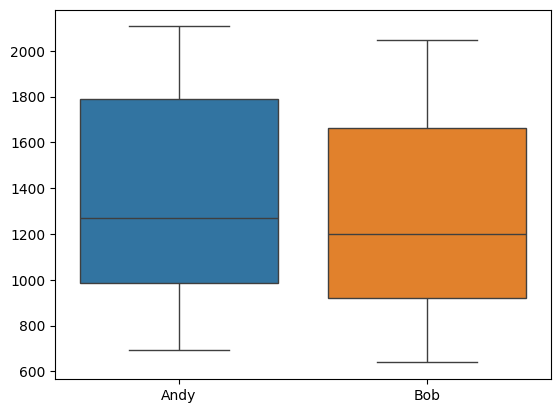

In [8]:
sns.boxplot(data=df)

We can see that the median sales in Andy's store is slightly better than Bob's

In [10]:
#Mean difference calculation
df['Difference'] = df['Andy'] - df['Bob']
df.head()

,Day,Andy,Bob,Difference
0,Tuesday,981,933,48
1,Friday,1932,1827,105
2,Tuesday,873,825,48
3,Thursday,1338,1281,57
4,Sunday,1349,1267,82


In [16]:
mean_difference = df['Difference'].mean()
print(f'The mean difference is {mean_difference:.0f}$')

The mean difference is 81$


Average sales for Andy are about $81 more

Let's obtain some more descriptive statistics for both the restaurants

In [20]:
#Obtain descriptive statistics
pd.options.display.float_format= "{:,.2f}".format
df.describe()

,Andy,Bob,Difference
count,14.00,14.00,14.00
mean,"1,338.71","1,257.50",81.21
std,489.11,476.01,29.57
min,693.00,639.00,48.00
25%,987.00,921.75,57.00
50%,"1,271.50","1,200.50",78.00
75%,"1,791.00","1,662.00",98.25
max,"2,106.00","2,049.00",147.00


**Summary**:


###  Hypothesis Testing for Difference in Means

**Independent Samples**
- Equal variances

We shall start with conducting t-tests for difference in means using *scipy*. Assumes independent samples and equality of variance across populations.

The hypotheses are as follows.

> Let $\mu_1$ be the mean for Andy and $\mu_2$ the mean for Bob.

$$H_0: \mu_1-\mu_2 = 0$$
$$H_a: \mu_1-\mu_2 \neq 0$$

> This will be a two-sided test, with $\alpha$ = 0.05

In [21]:
##Import the necessary methods
from scipy.stats import ttest_ind as ti

In [22]:
##A quick look at the documentation of the ttest_ind method
?ti


In [26]:
## Run the t-test
ti(df.Andy, df.Bob , equal_var = True)


TtestResult(statistic=0.44523214069369493, pvalue=0.6598369595940106, df=26.0)

- Unequal variances

Next, we can run the test, without the equal variance assumption

In [25]:
##Run the test for the unequal variance assumption
ti(df.Andy, df.Bob , equal_var = False)

TtestResult(statistic=0.44523214069369493, pvalue=0.6598396576346227, df=25.980860679682216)

In [27]:
### Additional Code
### To test equality of variances

##Import the necessary methods
from scipy.stats import bartlett as bt
bt(df.Andy,df.Bob)

# Bartlett's test of equality of variances

BartlettResult(statistic=0.009225415343954173, pvalue=0.923481635617045)

# **the independent sample approach did not provide us with enough evidence to reject the null hypothesis and conclude that Andy's restaurant is actually performing better**---

**Paired Samples**

In [ ]:
##Reiterating the need for using paired samples
## Plot a scatterplot between Andy's sales and Bob's sales

<Axes: xlabel='Andy', ylabel='Bob'>

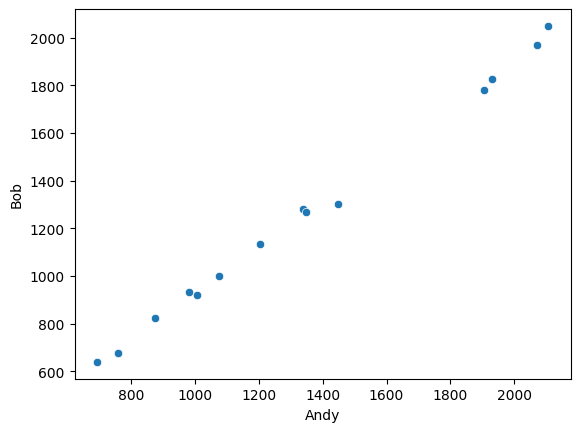

In [30]:
sns.scatterplot(x='Andy', y='Bob', data=df)

**Observation**:

##### Using one-sample t-test on the Difference column

We already have computed the "Difference" column. We can use it to perform hypothesis tests.

Our hypotheses changes *a little bit*

> Let $\mu_d$ denote the difference in means for sales in Andy's and Bob's restaurants

> Our original hypotheses that was shown previously changes to

$$H_0: \mu_d = 0$$
$$H_a: \mu_d \neq 0$$

> This will still be a two-sided test, with $\alpha$ = 0.05

In [31]:
## We can peform a one-sample t-test on the 'Difference' column
## Import the necessary methods
from scipy.stats import ttest_1samp as ts1

In [32]:
##Let's check the documentation for ttest_1amp
?ts1

# there is a 'day-of-the-week' effect, which leads to similar revenues for both Andy and Bob for same day of the week. This provides us with the motivation to go the paired samples approach route.**bold text**

In [33]:
## Run the one-sample t-test
ts1(df.Difference, popmean = 0)

TtestResult(statistic=10.275885788346828, pvalue=1.3108746661209956e-07, df=13)

# **Since P-value is nearly 0 indicating that the null hypothesis can be rejected. **
**Thus in the Paired sample case we can observe significant evidence to suggest that Andy's restaurant performed better than Bob's.**

###### Using two-sample t-test for paired samples

In [34]:
#Import the necessary methods
from scipy.stats import ttest_rel as tr

In [35]:
## A quick look at the ttest_rel method's documentation
?tr

In [36]:
# Paired sample t-test
tr(df.Andy,df.Bob,axis=0,alternative='two-sided')

TtestResult(statistic=10.275885788346828, pvalue=1.3108746661209956e-07, df=13)

# **Exctly the same result as earlier**

##### Using paired t-test in Pingouin

*Pingouin* is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. It provides slightly more exhaustive statistical information by default as compared to the methods in the *scipy.stats* package

Read more: https://pingouin-stats.org/

In [37]:
##Install pingouin if it's not already there in the system
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.8 MB/s eta 0:00:00


In [38]:
##Import the library
import pingouin as pg

In [39]:
## Check the documentation for pg.ttest
?pg.ttest

In [41]:
## We can first conduct an unpaired test
## To verify the results we got in the independent samples case
pg.ttest(df.Andy,df.Bob)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.45,26,two-sided,0.66,"[-293.73, 456.16]",0.17,0.381,0.07


In [42]:
## Now we can go ahead and conduct the paired test
## Here, paired will be set to True
pg.ttest(df.Andy,df.Bob,paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.28,13,two-sided,0.00,"[64.14, 98.29]",0.17,1.082e+05,0.09
